Overview

Waze

Waze’s free navigation app makes it easier for drivers around the world to get to where they want to go. Waze’s community of map editors, beta testers, translators, partners, and users helps make each drive better and safer. Waze partners with cities, transportation authorities, broadcasters, businesses, and first responders to help as many people as possible travel more efficiently and safely. 


We are about to start a new project to help prevent user churn on the Waze app. Churn quantifies the number of users who have uninstalled the Waze app or stopped using the app. This project focuses on monthly user churn. We will analyze user data and develop a machine learning model that predicts user churn. 

Task1

We will build a dataframe for the churn data. After the dataframe is complete, we will organize the data for the process of exploratory data analysis

Task2

We will conduct exploratory data analysis on data for the churn project. We’ll also use tools to create visuals for an executive summary to help non-technical stakeholders engage and interact with the data.

Task3

We will conduct hypothesis testing on the data for the churn data. We investigate Waze's dataset to determine which hypothesis testing method best serves the data and the churn project.

Task4

We will create a regression model for the churn project. We'll determine the type of regression model that is needed and develop one using Waze's churn project data.

Task5

We will create the final machine learning model for the churn project. These final tasks include feature engineering, model development, and evaluation. 

Task 1

In [1]:
#Import packages for data manipulation
import pandas as pd
import numpy as np

In [2]:
#Load dataset into dataframe
df=pd.read_csv('C:/Users/0&1/OneDrive/Documents/waze_dataset.csv')

In [3]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


- None of the variables in the first 10 observations have missing values.
- The variables label and device are of type object; total_sessions, driven_km_drives, and duration_minutes_drives are of type float64; the rest of the variables are of type in64. There are 14,999 rows and 13 columns.
- The dataset has 700 missing values in the label column.

In [5]:
#Isolate rows with null values
null_df=df[df['label'].isnull()]
#Display summary stats of rows with null values
null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [6]:
#Isolate rows without null values
not_null_df = df[~df['label'].isnull()]
#Display summary stats of rows without null values
not_null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


- Comparing summary statistics of the observations with missing retention labels with those that aren't missing any values reveals nothing remarkable. 
- The means and standard deviations are fairly consistent between the two groups.

null values of iPhone users and Android users:

In [7]:
#Get count of null values by device
null_df['device'].value_counts()

device
iPhone     447
Android    253
Name: count, dtype: int64

Of the 700 rows with null values, 447 were iPhone users and 253 were Android users.

In [8]:
#Calculate % of iPhone nulls and Android nulls
null_df['device'].value_counts(normalize=True)

device
iPhone     0.638571
Android    0.361429
Name: proportion, dtype: float64

In [9]:
#Calculate % of iPhone users and Android users in full dataset
df['device'].value_counts(normalize=True)

device
iPhone     0.644843
Android    0.355157
Name: proportion, dtype: float64

- The percentage of missing values by each device is consistent with their representation in the data overall.
- There is nothing to suggest a non-random cause of the missing data. 

In [10]:
#Calculatte counts of churned vs. retained 
print(df['label'].value_counts())
print()
print(df['label'].value_counts(normalize=True))

label
retained    11763
churned      2536
Name: count, dtype: int64

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64


- This dataset contains 82% retained users and 18% churned users.

In [11]:
#Calculate median values of all columns for churned and retained users
df.groupby('label').median(numeric_only=True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


This offers an interesting snapshot of the two groups, churned vs. retained:
- Users who churned averaged ~3 more drives in the last month than retained users, but retained users used the app on over twice as many days as churned users in the same time period. 
- The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user.
- It seems that churned users had more drives in fewer days, and their trips were farther and longer in duration.


We calculate the median kilometers per drive in the last month for both retained and churned users:

We divide the driven_km_drives column by the drives column. Then, group the results by churned/retained and calculate the median km/drive of each group.

In [12]:
#Add a column to df called 'km_per_drive'
df['km_per_drive'] = df['driven_km_drives']/ df['drives']

#Group by 'label', calculate the median, and isolate for km per drive
median_km_per_drive=df.groupby('label').median(numeric_only=True)[['km_per_drive']]
median_km_per_drive

,km_per_drive
label,
churned,74.109416
retained,75.014702


- The median retained user drove about one more kilometer per drive than the median churned user.

Calculating kilometers per driving day:

In [13]:
#Add a column to df called 'km_per_driving_day'
df['km_per_driving_day']=df['driven_km_drives']/df['driving_days']

#Group by 'label', calculate the median, and isolate for km per driving day
median_km_per_driving_day=df.groupby('label').median(numeric_only=True)[['km_per_driving_day']]
median_km_per_driving_day

,km_per_driving_day
label,
churned,697.541999
retained,289.549333


In [14]:
#Add a column to df called 'drives_per_driving_day'
df['drives_per_driving_day']=df['drives']/df['driving_days']

#Group by 'label', calculate the median, and isolate for drives per driving day
median_drives_per_driving_day=df.groupby('label').median(numeric_only=True)[['drives_per_driving_day']]
median_drives_per_driving_day

,drives_per_driving_day
label,
churned,10.0000
retained,4.0625


- The median user who churned drove 698 kilometers each day they drove last month, which is ~240% the per-drive-day distance of retained users.
- The median churned user had a similarly disproporionate number of drives per drive day compared to retained users.
- It is clear from these figures that, regardless of whether a user churned or not, the users represented in this data are serious drivers! It would probably be safe to assume that this data does not represent typical drivers at large. Perhaps the data-and in particular the sample of churned users- contains a high proportion of long-haul truckers. It is possible that the reason for their driving so much is also the reason why the Waze app does not meet their specific set of needs, which may differ from the needs of a more typical driver, such as a commuter.  
- In consideration of how much these users drive, it would be worthwhile to recommend to Waze that they gather more data on these super-drivers.



Examining whether there is an imbalance in how many users churned by device type:

In [15]:
#First, for each label, calculate the number of Android users and iPhone users
df.groupby(['label', 'device']).size()

label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64

In [16]:
#Then, for each label, calculate the percentage of Android users and iPhone users
df.groupby('label')['device'].value_counts(normalize=True)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: proportion, dtype: float64

- The dataset has 700 missing values in the label column. There was no obvious patter to the missing values.
- We used the median value of the sample instead of mean because mean is subject to the influence of outliers, while the median represents the middle value of the distribution regardless of any outlying values.
- About the median user who churned drove 698 kilometers each day they drove last month, which is about 240% the per-drive-day distance of retained users, I think it would behelpful to know how this data was collected and if it represents a non-random sample of users.
- Android users comprised approximately 36% of the sample, while iPhone users made up about 64%.
- Generally, users who churned drove farther and longer in fewer days than retained users. They also used the app about half as many times as retained users over the same period.
- The churn rate for both iPhone and Android users was within one percentage point of each other. There is nothing suggestive of churn being correlated with device. 

Task 2

In [17]:
#Import packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

Plots we need:

- Box plots will be helpful to determine outliers and where the bulk of the data points reside in terms of drives, sessions and all other continuous numeric variables.
- Histograms are essential to understand the distribution of variables.- Scatter plots will be helpful to visualize relationships between variable. - 
Bar charts are useful for communicating levels and quantities, especially for categorical informati.on

We begin by examining the spread and distribution of important variables using box plots and histograms.

sessions

The number of occurrence of a user opening the app during the month

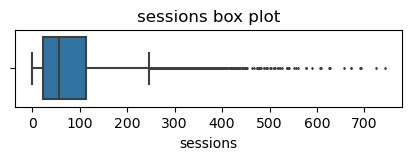

In [18]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['sessions'], fliersize=1)
plt.title('sessions box plot');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


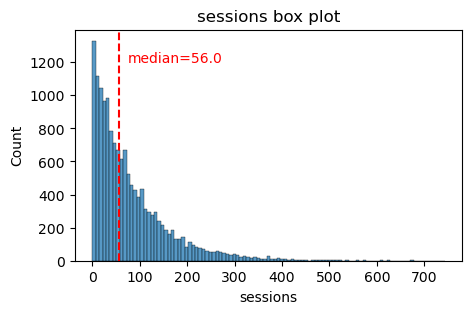

In [19]:
# Histogram
plt.figure(figsize=(5,3))
sns.histplot(x=df['sessions'])
median = df['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1200, 'median=56.0', color='red')
plt.title('sessions box plot');

- The sessions variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

drives

An occurrence of driving at least 1 km during the month

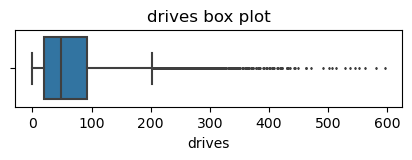

In [20]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['drives'], fliersize=1)
plt.title('drives box plot');

The following code block defines a function that helps plot histograms with a particular style/format using this particular dataset. 

In [21]:
# Helper function to plot histograms based on the
# format of the `sessions` histogram
def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha="left", va="top", transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


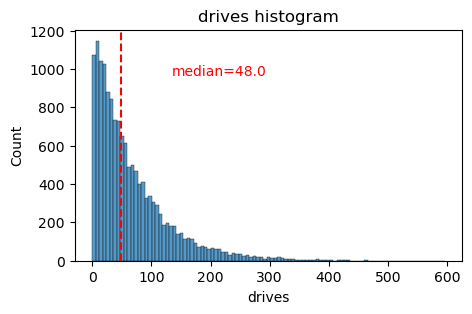

In [22]:
# Histogram
histogrammer('drives')

- The drives information follows a distribution similar to the sessions variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

total_sessions

A model estimate of the total number of sessions since a user has onboarded

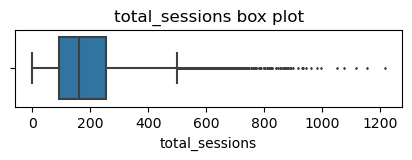

In [23]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['total_sessions'], fliersize=1)
plt.title('total_sessions box plot');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


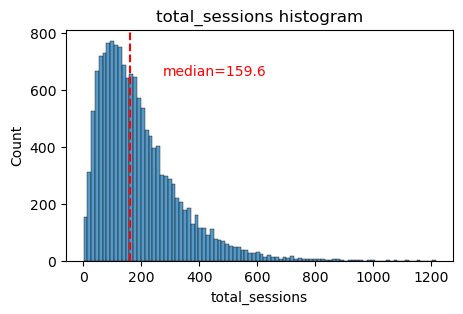

In [24]:
# Histogram
histogrammer('total_sessions')

The total_sessions is a right-skewed distribution that looks more normal than the previous variables. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month.

n_days_after_onboarding

The number of days since a user signed up for the app

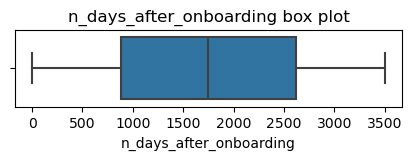

In [25]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['n_days_after_onboarding'], fliersize=1)
plt.title('n_days_after_onboarding box plot');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Median: 1741.0


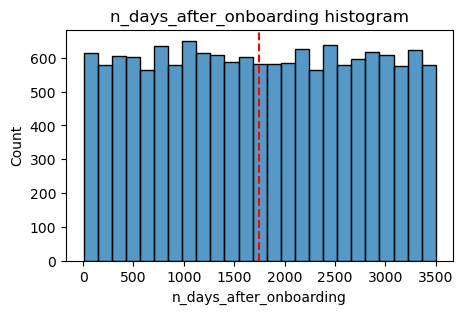

In [26]:
# Histogram
histogrammer('n_days_after_onboarding', median_text=False)

The total user tenure (i.e., number of days since onboarding) is a uniform distribution with values ranging from near-zero to ~3,500 (~9.5 years).

driven_km_drives

Total kilometers driven during the month

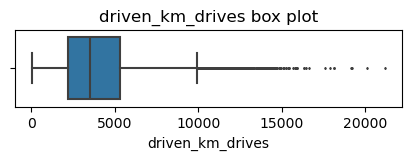

In [27]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driven_km_drives'], fliersize=1)
plt.title('driven_km_drives box plot');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


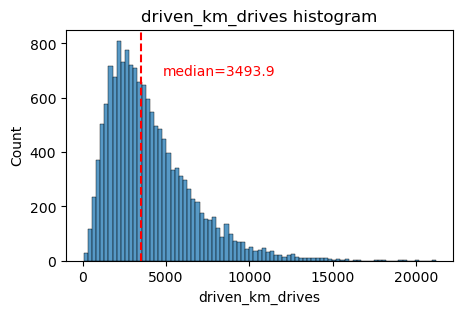

In [28]:
# Histogram
histogrammer('driven_km_drives')

The number of drives driven in the last month per user resembles a right-skewed normal distribution with half the users driving under 3,495 kilometers.

duration_minutes_drives

Total duration driven in minutes during the month

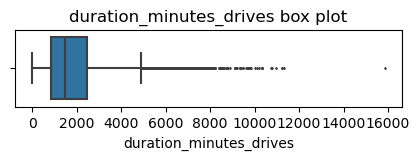

In [29]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['duration_minutes_drives'], fliersize=1)
plt.title('duration_minutes_drives box plot');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


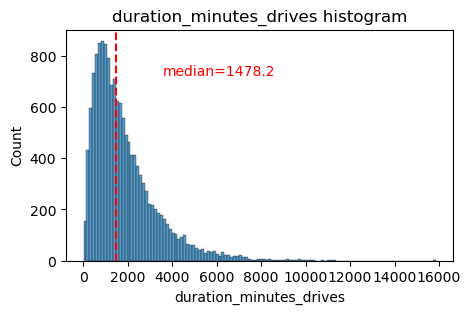

In [30]:
# Histogram
histogrammer('duration_minutes_drives')

The duration_minutes_drives variable has a normalish distribution with a heavily skewed right tail. Half of the users drove less than ~1,478 minutes (~25 hours), but some users clocked over 250 hours over the month.

activity_days

Number of days the user opens the app during the month

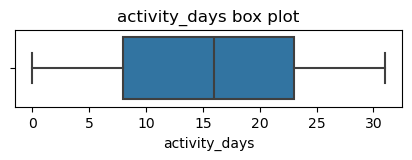

In [31]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['activity_days'], fliersize=1)
plt.title('activity_days box plot');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Median: 16.0


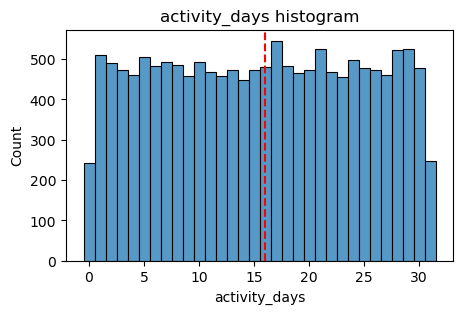

In [32]:
# Histogram
histogrammer('activity_days', median_text=False, discrete=True)

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the sessions distribution, which we might think would be closely correlated with activity_days.

driving_days

Number of days the user drives (at least 1 km) during the month

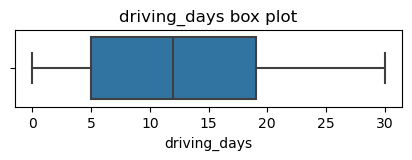

In [33]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driving_days'], fliersize=1)
plt.title('driving_days box plot');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Median: 12.0


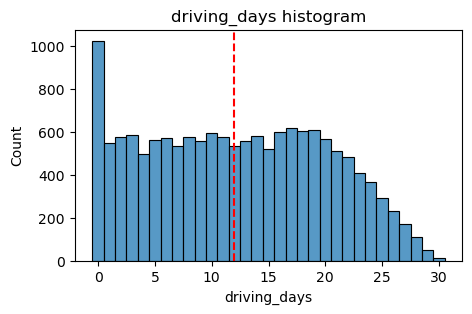

In [34]:
# Histogram
histogrammer('driving_days', median_text=False, discrete=True)

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the driving_days distribution tails off on the right.

However, there were almost twice as many users (~1,000 vs. ~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from activity_days. That variable had ~500 users opening the app on each of most of the day counts, but there were only ~250 users who did not open the app at all during the month and ~250 users who opened the app every day. Flag this for further investigation later.

device

The type of device a user starts a session with

This is a categorical variable, so we do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

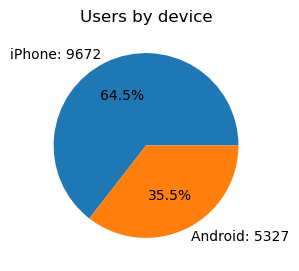

In [35]:
# Pie chart
fig = plt.figure(figsize=(3,3))
data=df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Users by device');

There are nearly twice as many iPhone users as Android users represented in this data.

label

Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month

This is also a categorical variable, and as such would not be plotted as a box plot. Plot a pie chart instead.

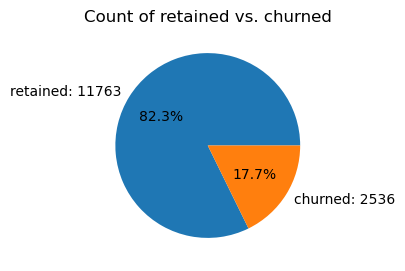

In [36]:
# Pie chart
fig = plt.figure(figsize=(3,3))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Count of retained vs. churned');

Less than 18% of the users churned.

driving_days vs. activity_days

Because both driving_days and activity_days represent counts of days over a month and they're also closely related, we can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of driving_days and user_days.

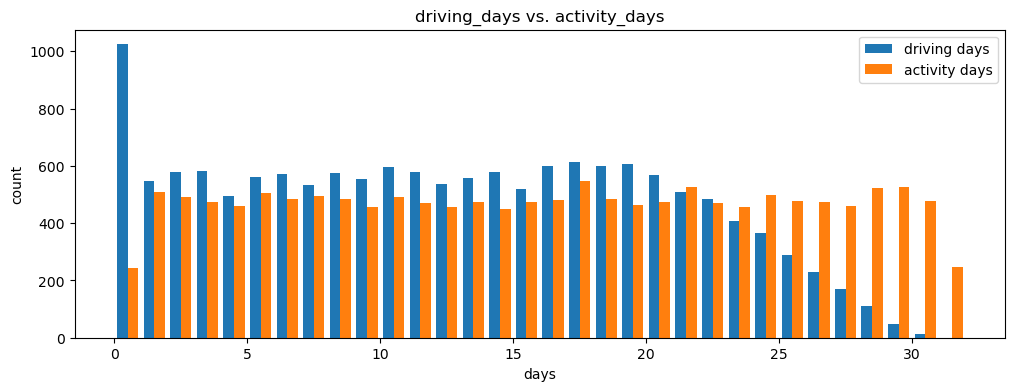

In [37]:
# Histogram
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

As observed previously, this might seem counterintuitive. After all, why are there fewer people who didn't use the app at all during the month and more people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive—perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable—driving_days and activity_days.

In [38]:
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

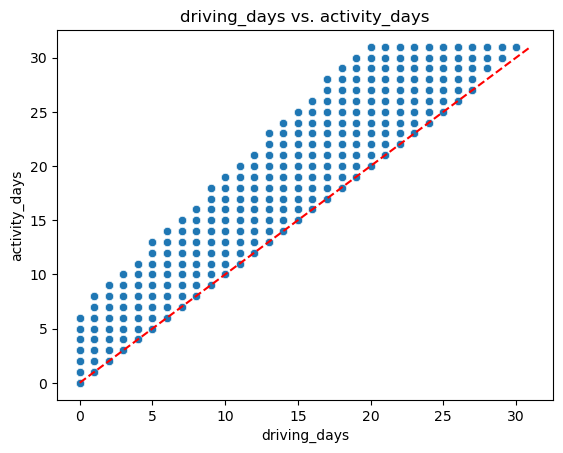

In [39]:
# Scatter plot
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--');

there is a theoretical limit. If we use the app to drive, then by definition it must count as a day-use as well. In other words, we cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

Retention by device

Plot a histogram that has four bars—one for each device-label combination—to show how many iPhone users were retained/churned and how many Android users were retained/churned.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


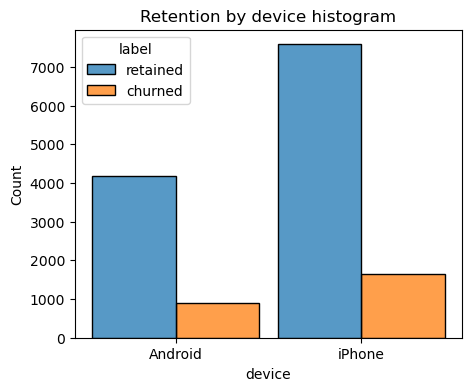

In [40]:
# Histogram
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

The proportion of churned users to retained users is consistent between device types.

Retention by kilometers driven per driving day

We discovered that the median distance driven last month for users who churned was 8.33 km, versus 3.36 km for people who did not churn. Now we examine this further.

1- We create a new column in df called km_per_driving_day, which represents the mean distance driven per driving day for each user.

2- We call the describe() method on the new column.

In [41]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

The mean value is infinity, the standard deviation is NaN, and the max value is infinity. This is the result of there being values of zero in the driving_days column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1- We convert these values from infinity to zero. We can use np.inf to refer to a value of infinity.

2- We call describe() on the km_per_driving_day column to verify that it worked.

In [42]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers per drive day. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, we disregard rows where the distance in this column is greater than 1,200 km.

We plot a histogram of the new km_per_driving_day column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the multiple parameter of seaborn's histplot() function to fill.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


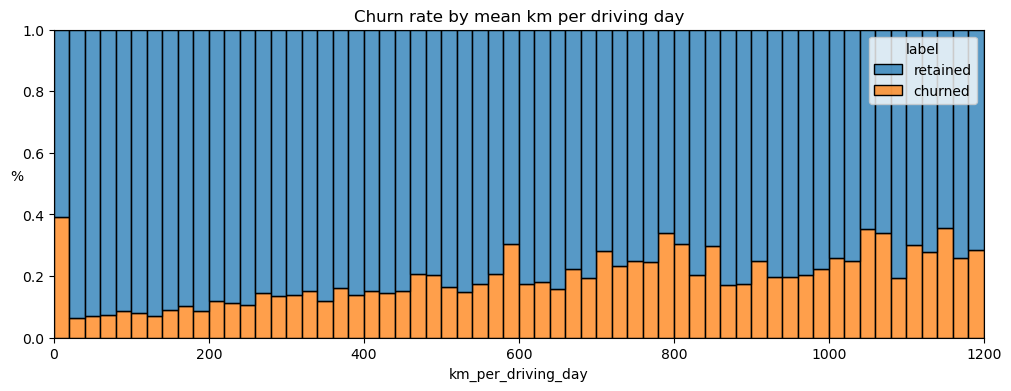

In [43]:
# Histogram
plt.figure(figsize=(12,4))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

Churn rate per number of driving days

We create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


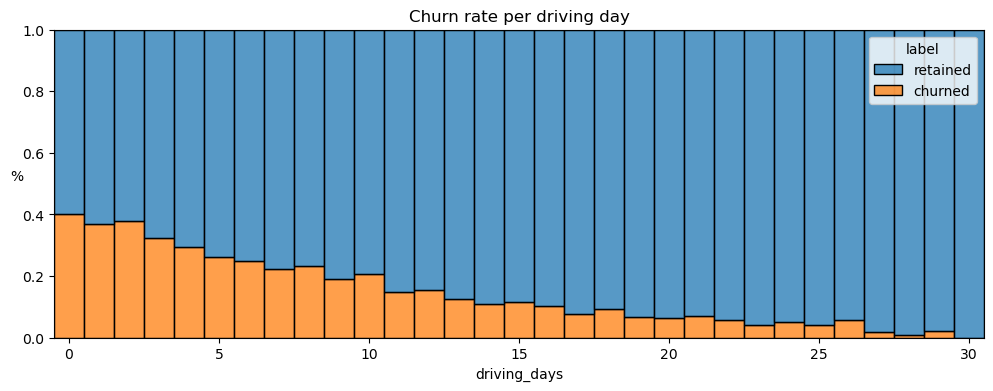

In [44]:
# Histogram
plt.figure(figsize=(12,4))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

Proportion of sessions that occurred in the last month

We create a new column percent_sessions_in_last_month that represents the percentage of each user's total sessions that were logged in their last month of use.

In [45]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

In [46]:
df['percent_sessions_in_last_month'].median()

0.42309702992763176

Now, we create a histogram depicting the distribution of values in this new column.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Median: 0.4


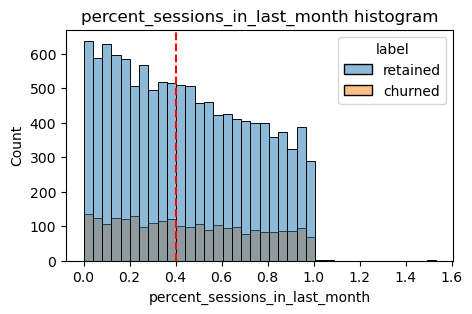

In [47]:
# Histogram
histogrammer('percent_sessions_in_last_month',
             hue=df['label'],
             multiple='layer',
             median_text=False)

We check the median value of the n_days_after_onboarding variable.

In [48]:
df['n_days_after_onboarding'].median()

1741.0

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

We make a histogram of n_days_after_onboarding for just the people who had 40% or more of their total sessions in the last month.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


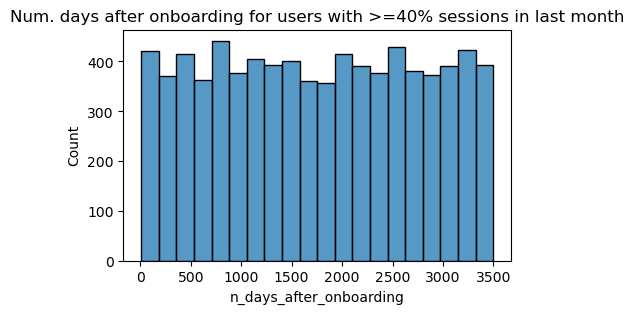

In [49]:
# Histogram
data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month');

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

Handling outliers

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

We set a threshold based on a percentile of the distribution. To practice this technique, we write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile. such as the 95th percentile of the distribution.

In [50]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

Next, we apply that function to the following columns:

- sessions
- drives
- total_sessions
- driven_km_drives
- duration_minutes_drives

In [51]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


In [52]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1.499900e+04,14999.000000,1.499200e+04,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,inf,578.963113,inf,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,NaN,1030.094384,NaN,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,1.008775e+00,0.000000,0.000000e+00,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,3.323065e+01,136.238895,1.800000e+00,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,7.488006e+01,272.889272,4.666667e+00,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,1.854667e+02,558.686918,1.216667e+01,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,inf,15420.234110,inf,1.530637


Conclusion

Analysis revealed that the overall churn rate is ~17%, and that this rate is consistent between iPhone users and Android users.

Also, EDA has revealed that users who drive very long distances on their driving days are more likely to churn, but users who drive more often are less likely to churn.

- There is missing data in the user churn label, so we might need further data processing before further analysis.
- There are many outlying observations for drives, so we might consider a variable transformation to stabilize the variation.
- The number of drives and the number of sessions are both strongly correlated, so they might provide redundant information when we incorporate both in a model.
- On average, retained users have fewer drives than churned users.

We want to know:
- What are the key variables associated with user churn?
- Can we implement policies to reduce user churn?

In [53]:
df['monthly_drives_per_session_ratio'] = (df['drives']/df['sessions'])

In [54]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio
0,0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737,0.953670,0.827160
1,1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273,0.406856,0.804511
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000,0.841186,0.833333
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,304.530374,13.333333,0.724968,0.816327
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,219.455667,3.777778,0.499266,0.809524
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone,8.749890,81.930791,9.363636,0.404229,0.911504
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone,2624.586414,228.224906,0.086957,0.012673,0.666667
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone,225.487213,394.602623,1.750000,0.221499,0.897436
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android,57.645864,132.585488,2.300000,0.310573,0.807018
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone,88.874416,2014.486765,22.666667,0.343134,0.809524


Conclusions:
- Nearly all the variables were either very right-skewed or uniformly distributed. For the right-skewed distributions, this means that most users had values in the lower end of the range for that variable. For the uniform distributions, this means that users were generally equally likely to have values anywhere within the range for that variable.
- Most of the data was not problematic, and there was no indication that any single variable was completely wrong. However, several variables had highly improbable or perhaps even impossible outlying values, such as driven_km_drives. Some of the monthly variables also might be problematic, such as activity_days and driving_days, because one has a max value of 31 while the other has a max value of 30, indicating that data collection might not have occurred in the same month for both of these variables.
- Less than 18% of users churned, and ~82% were retained.
- Distance driven per driving day had a positive correlation with user churn. The farther a user drove on each driving day, the more likely they were to churn. On the other hand, number of driving days had a negative correlation with churn. Users who drove more days of the last month were less likely to churn.
- Users of all tenures from brand new to ~10 years were relatively evenly represented in the data. This is borne out by the histogram for n_days_after_onboarding, which reveals a uniform distribution for this variable.

At the end, I'd want to ask the Waze data team to confirm that the monthly variables were collected during the same month, given the fact that some have max values of 30 days while others have 31 days. I'd also want to learn why so many long-time users suddenly started using the app so much in just the last month. Was there anything that changed in the last month that might prompt this kind of behavior?

Task 3

Research question:

"Do drivers who open the application using an iPhone have the same number of drives on average as drivers who use Android devices?"

In [55]:
#Import packages
from scipy import stats

In the dataset, device is a categorical variable with the labels iPhone and Android.

In order to perform this analysis, we must turn each label into an integer. The following code assigns a 1 for an iPhone user and a 2 for Android. It assigns this label back to the variable device_type.

In [56]:
#1.create 'map_dictionary'
map_dictionary={'Android':2, 'iPhone':1}

#2.create new 'device_type' column
df['device_type']=df['device']

#3.map the new column to the dictionary
df['device_type']=df['device_type'].map(map_dictionary)

df['device_type'].head()

0    2
1    1
2    2
3    1
4    2
Name: device_type, dtype: int64

- We are interested in the relationship between device type and the number of drives. One approach is to look at the average number of drives for each device type.

In [57]:
df.groupby('device_type')['drives'].mean()

device_type
1    64.446340
2    63.353482
Name: drives, dtype: float64

- Based on the averages shown, it appears that drivers who use an iPhone device to interact with the application have a higher number of drives on average. However, this difference might arise from random sampling, rather than being a true difference in the number of drives. To assess whether the difference is statistically significant, we can conduct a hypothesis test.

Hypothesis testing:

H0: There is no differencein average number of drives between drivers who use iPhone devices and drivers who use Androids.

H1: There is a difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

This is a t-test for two independent samples. This is the appropriate test since the two groups are independent (Android users vs. iPhone users).

In [58]:
#1.Isolate the 'drives' column for iPhone users.
iPhone=df[df['device_type']==1]['drives']

#2.Isolate the 'drives' column for Android users.
Android=df[df['device_type']==2]['drives']

#3.perform the t-test
stats.ttest_ind(a=iPhone, b=Android, equal_var=False)

TtestResult(statistic=1.1643714136026293, pvalue=0.24429844267242223, df=11148.669519764011)

- Since the p-value is larger than the chosen significance level (5%), we fail to reject the null hypothesis. We conclude that there is not a statistically significant difference in the average number of drives between drivers who use iPhones and drivers who use Androids.

One potential next step is to explore what other factors influence the variation in the number of drives, and run additional hypothesis tests to learn more about user behavior. Further, temporary changes in marketing or user interface for the Waze app may provide more data to investigate churn.

Task 4

In [59]:
#packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [60]:
print(df.shape)

df.info()

(14999, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                14999 non-null  int64  
 1   label                             14299 non-null  object 
 2   sessions                          14999 non-null  int64  
 3   drives                            14999 non-null  int64  
 4   total_sessions                    14999 non-null  float64
 5   n_days_after_onboarding           14999 non-null  int64  
 6   total_navigations_fav1            14999 non-null  int64  
 7   total_navigations_fav2            14999 non-null  int64  
 8   driven_km_drives                  14999 non-null  float64
 9   duration_minutes_drives           14999 non-null  float64
 10  activity_days                     14999 non-null  int64  
 11  driving_days                      14999 non-null  int64

We are going to drop the columns that we do not need.

In [61]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio,device_type
0,0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737,0.953670,0.827160,2
1,1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273,0.406856,0.804511,1
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000,0.841186,0.833333,2
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,304.530374,13.333333,0.724968,0.816327,1
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,219.455667,3.777778,0.499266,0.809524,2


In [62]:
df=df.drop(['ID', 'km_per_drive', 'drives_per_driving_day', 'percent_sessions_in_last_month', 'monthly_drives_per_session_ratio', 'device_type'], axis=1)

In [63]:
df['label'].value_counts(normalize=True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
dtypes: float64(4), int64(7), object(2)
memory usage: 1.5+ MB


In [65]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113
std,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918
max,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110


- Now we create a new, binary feature called professional_driver that is a 1 for users who had 60 or more drives and drove on 15+ days in the last month. 

The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary. 

In [66]:
#create 'professional_driver' column
df['professional_driver']=np.where((df['drives']>=60) & (df['driving_days']>=15),1,0)

In [67]:
#1.check count of professionals and non-professionals
print(df['professional_driver'].value_counts())

#2.check in-class churn rate
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

professional_driver
0    12405
1     2594
Name: count, dtype: int64


professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64

- The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
 13  professional_driver      14999 non-null  int32  
dtypes: float64(4), int32(1

In [69]:
#Drop rows with missing data in 'label' column
df=df.dropna(subset=['label'])

For this analysis, we impute the outlying values for these columns. We calculate the 95th percentile of each column and change to this value any value in the column that exceeds it.

In [70]:
#Impute outliers
for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']:
    threshold=df[column].quantile(0.95)
    df.loc[df[column]> threshold, column]=threshold

In [71]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.663233,1751.822505,114.562767,27.187216,3944.110515,1792.911210,15.544653,12.182530,581.942399,0.173998
std,67.243178,55.127927,118.596924,1008.663834,124.378550,36.715302,2217.358063,1224.329759,9.016088,7.833835,1038.254509,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.000000
max,243.000000,200.000000,454.363204,3500.000000,422.000000,124.000000,8889.794236,4668.180092,31.000000,30.000000,15420.234110,1.000000


- Then, we change the data type of the label column to be binary. This change is needed to train a logistic regression model.

so, we :
- assign 0 for all retained users.
- assign 1 for all churned users.
- save this variable as label2 as to not overwrite the original label variable.

In [72]:
#create binary 'label2' column
df['label2']=np.where(df['label']=='churned',1 , 0)
df[['label', 'label2']].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


Assumptions for logistic regression:
- Independent observations(refers to how the data was collected.)
- No extreme outliers
- Little to no multicollinearity among X predictors.
- Linear relationship between X and the logit of y.


The first and second assumptions are met, and the last assumption will be verified after modeling.

Collinearity

In [73]:
df.corr(method ='pearson', numeric_only=True)

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2
sessions,1.000000,0.996942,0.597299,0.007101,0.001858,0.008536,0.002995,-0.004545,0.025113,0.020294,-0.011569,0.443654,0.034911
drives,0.996942,1.000000,0.595396,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.010989,0.444425,0.035865
total_sessions,0.597299,0.595396,1.000000,0.006615,0.000194,0.010363,0.001015,-0.000345,0.015757,0.012957,-0.016162,0.254532,0.024568
n_days_after_onboarding,0.007101,0.006940,0.006615,1.000000,-0.002450,-0.004968,-0.004655,-0.010167,-0.009418,-0.007321,0.011764,0.003770,-0.129263
total_navigations_fav1,0.001858,0.001058,0.000194,-0.002450,1.000000,0.002866,-0.007365,0.005646,0.010902,0.010419,-0.000197,-0.000224,0.052322
total_navigations_fav2,0.008536,0.009505,0.010363,-0.004968,0.002866,1.000000,0.003567,-0.003009,-0.004425,0.002000,0.006751,0.007126,0.015032
driven_km_drives,0.002995,0.003445,0.001015,-0.004655,-0.007365,0.003567,1.000000,0.690547,-0.007445,-0.009550,0.344765,-0.000901,0.019771
duration_minutes_drives,-0.004545,-0.003889,-0.000345,-0.010167,0.005646,-0.003009,0.690547,1.000000,-0.007895,-0.009425,0.239627,-0.012128,0.040407
activity_days,0.025113,0.024357,0.015757,-0.009418,0.010902,-0.004425,-0.007445,-0.007895,1.000000,0.947687,-0.397433,0.453825,-0.303851
driving_days,0.020294,0.019608,0.012957,-0.007321,0.010419,0.002000,-0.009550,-0.009425,0.947687,1.000000,-0.407917,0.469776,-0.294259


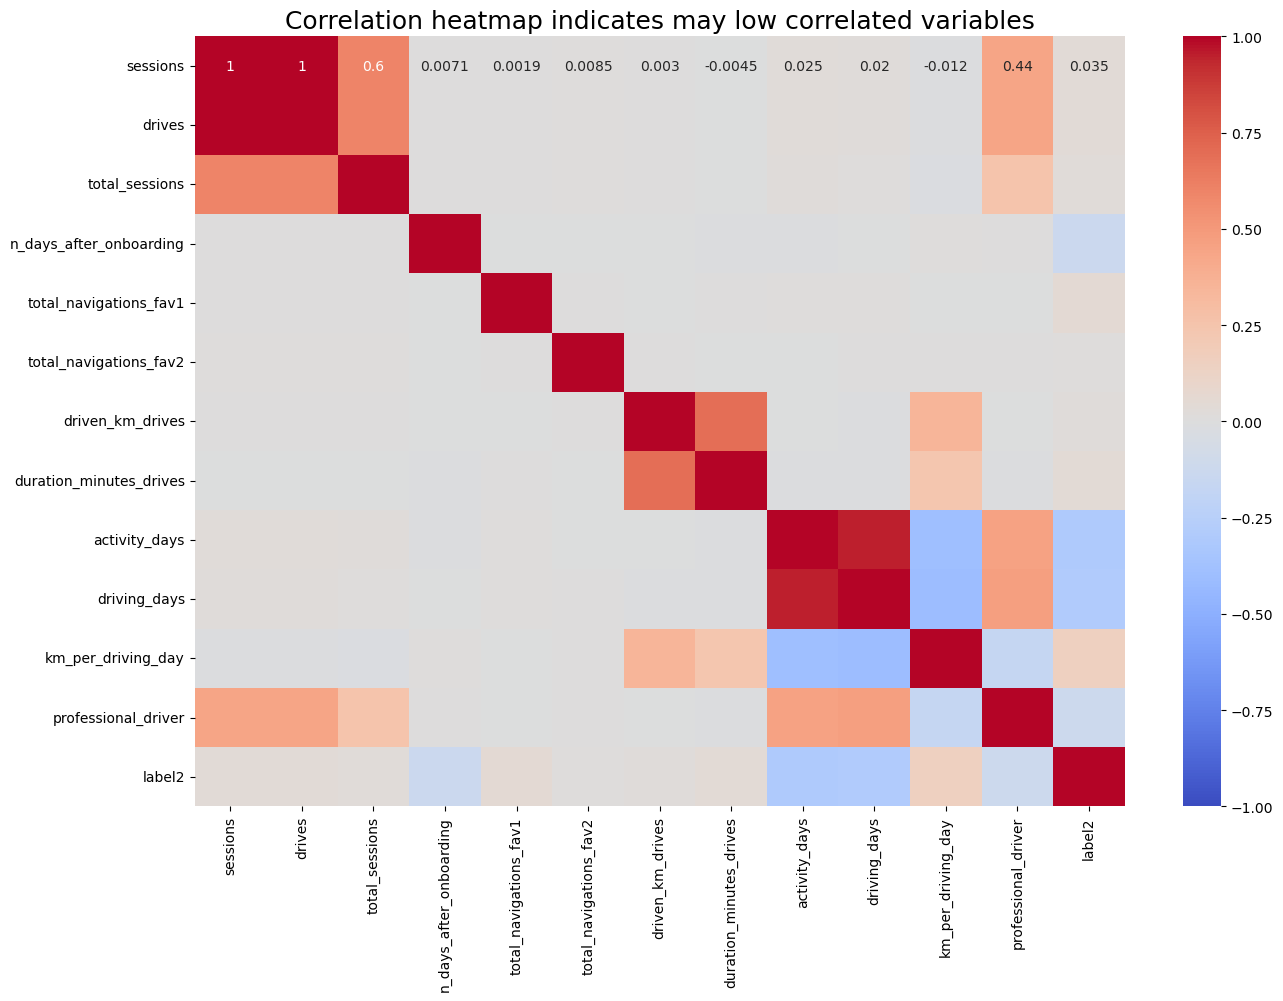

In [74]:
#plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson', numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates may low correlated variables',
          fontsize=18)
plt.show();

- So, sessions and drives: 1.0,  and driving_days and activity_days:0.95 are multicollinear with each other because their Pearson correlation coefficient values are greater than the absolute value of 0.7.

Creating dummies:


In [75]:
#create new 'device2' variable
df['device2']=np.where(df['device']=='Android', 0, 1)
df[['device', 'device2']].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


Build a Logistic Regression

We drop the following variables and assign the results to X:
- label(this is the target)
- label2(this is the target)
- device(this is the non-binary-encoded categorical variable)
- sessions(this had high multicollinearity)
- driving_days(this had high multicollinearity)

We chose the sessions and driving_days to be dropped rather than drives and activity_days because the features that were kept for modeling had slightly stronger correlations with the target variable than the features that were dropped.

In [76]:
#Isolate predictor variables
X=df.drop(columns=['label', 'label2', 'device', 'sessions', 'driving_days'])

In [77]:
#Isolate target variable
y=df['label2']

Split the data

In [78]:
#perform the train-test split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=422)

In [79]:
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
13317,40,242.839761,284,422,124,3658.050302,2008.997675,8,457.256288,0,0
11834,200,340.108116,3269,86,46,1685.462339,1096.112849,15,168.546234,0,0
3853,123,194.480835,1287,48,36,4366.129495,2277.070805,11,1091.532374,0,1
10703,114,207.917728,1690,73,51,834.773345,100.534629,3,278.257782,0,1
13713,28,252.555799,2732,39,23,4708.995020,2820.387331,28,204.738914,0,0


In [80]:
model=LogisticRegression(penalty='none', max_iter=400)

model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(max_iter=400, penalty='none')

In [81]:
pd.Series(model.coef_[0], index=X.columns)

drives                     0.002061
total_sessions             0.000131
n_days_after_onboarding   -0.000416
total_navigations_fav1     0.001160
total_navigations_fav2     0.000451
driven_km_drives          -0.000026
duration_minutes_drives    0.000120
activity_days             -0.099768
km_per_driving_day         0.000038
professional_driver       -0.001482
device2                   -0.001028
dtype: float64

In [82]:
model.intercept_

array([-0.00160891])

In [83]:
#Get the predicted probabilities of the training data
training_probabilities=model.predict_proba(X_train)
training_probabilities

array([[0.52385352, 0.47614648],
       [0.89904033, 0.10095967],
       [0.74724295, 0.25275705],
       ...,
       [0.73352392, 0.26647608],
       [0.83068846, 0.16931154],
       [0.73072063, 0.26927937]])

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear.

In [84]:
#1.copy the 'X_train' dataframe and assign to 'Logit_data'
logit_data=X_train.copy()

#2.create a new 'logit' column in the 'logit_data' df
logit_data['logit']=[np.log(prob[1]/prob[0]) for prob in training_probabilities]

We plot a regplot where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities.

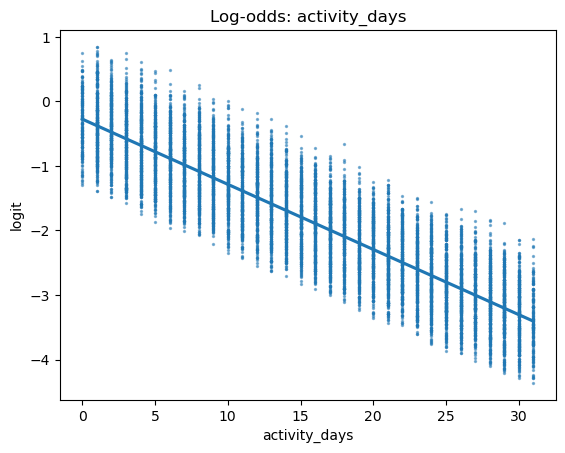

In [85]:
#plot regplot of 'activity_days' log-odds
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s':2, 'alpha': 0.5})
plt.title('Log-odds: activity_days');

In [86]:
#generate predictions on X_test
y_preds=model.predict(X_test)

In [87]:
#score the model (accuracy) on the test data
model.score(X_test, y_test)

0.8223776223776224

Confusion matrix

In [88]:
cm=confusion_matrix(y_test, y_preds)

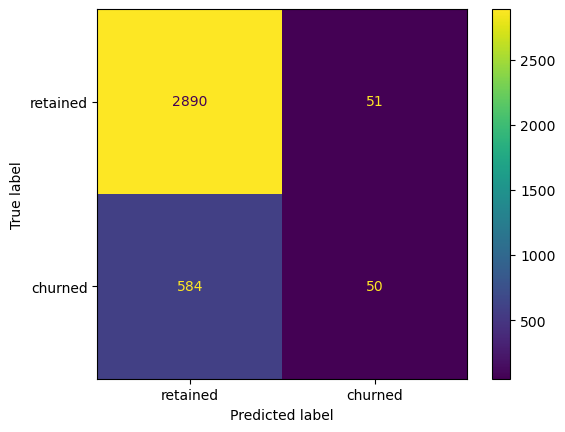

In [89]:
disp= ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['retained', 'churned'],
                            )
disp.plot();

In [90]:
#calculate precision manually
precision=cm[1,1]/(cm[0,1] + cm[1,1])
precision

0.49504950495049505

In [91]:
#calculate recall manually
recall=cm[1,1]/(cm[1,0] + cm[1,1])
recall

0.07886435331230283

In [92]:
#create a classification report
target_labels=['retained', 'churned']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.50      0.08      0.14       634

    accuracy                           0.82      3575
   macro avg       0.66      0.53      0.52      3575
weighted avg       0.77      0.82      0.77      3575



- The model has mediocre precision and very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

Results:
- Activity_days was by far the most important feature in the model. It had a negative correlation with user churn. This was not surprising, as this variable was very strongly correlated with driving_days, which was known from EDA to have a negative correlation with churn.
- In previous EDA, user churn rate increased as the values in km_per_driving_day increased. The correlation heatmap here revealed this variable to have the strongest positive correlation with churn of any of the predictor variables by a relatively large margin. In the model, it was the second-least-important variable.
- The model is not a strong enough predictor, as made clear by its poor recall score. However, if the model is only being used to guide further exploratory efforts, then it can have value.
- New features could be engineered to try to generate better predictive signal. In the case of thi model, one of the engineered features (professional_driver) was the third-most-predictive predictor. It could also be helpful to scale the predictor variables, and/or to reconstruct the model with different combinations of predictor variables to reduce noise from unpredictive features.
- It would be helpful to have drive-level information for each user(such as drive times, geographic locations, etc.). It would probably also be helpful to have more granular data to know how users interact with the app. For example, how often do they report or confirm road hazard alerts? Finally, it could be helpful to know the monthly count of unique starting and ending locations each driver inputs.

Task 5

The goal of this model is to predict whether or not a Waze user is retained or churned.

In [93]:
#This lets us see all of the columns, preventing Jupyter from redacting them.
pd.set_option('display.max_columns', None)

#Inport packages for data modeling
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#This is the function that helps plot feature importance
from xgboost import plot_importance

#This module lets us save our models once we fit them.
import pickle

In [94]:
#Import dataset
df0=pd.read_csv('C:/Users/0&1/OneDrive/Documents/waze_dataset.csv')

In [95]:
#Inspect the first five rows
df0.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [96]:
#copy the df0 dataframe
df=df0.copy()

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [98]:
#create 'km_per_driving_day' feature
df['km_per_driving_day']=df['driven_km_drives']/df['driving_days']

#call 'km_per_driving_day'
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [99]:
#convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day']=0

#confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

In [100]:
#create 'percent_sessions_in_last_month' feature
df['percent_sessions_in_last_month']=df['sessions']/df['total_sessions']

#call 'percent_sessions_in_last_month'
df['percent_sessions_in_last_month'].describe()

count    14999.000000
mean         0.449255
std          0.286919
min          0.000000
25%          0.196221
50%          0.423097
75%          0.687216
max          1.530637
Name: percent_sessions_in_last_month, dtype: float64

In [101]:
#create 'professional_driver' feature
df['professional_driver']=np.where((df['drives'] >=60) & (df['driving_days'] >=15), 1, 0)

In [102]:
#create 'total_sessions_per_day' feature
df['total_sessions_per_day'] = df['total_sessions']/df['n_days_after_onboarding']

In [103]:
#get descriptive stats
df['total_sessions_per_day'].describe()

count    14999.000000
mean         0.338698
std          1.314333
min          0.000298
25%          0.051037
50%          0.100775
75%          0.216269
max         39.763874
Name: total_sessions_per_day, dtype: float64

In [104]:
#create 'km_per_hour' feature
df['km_per_hour']=df['driven_km_drives']/(df['duration_minutes_drives']/60)
df['km_per_hour'].describe()

count    14999.000000
mean       190.394608
std        334.674026
min         72.013095
25%         90.706222
50%        122.382022
75%        193.130119
max      23642.920871
Name: km_per_hour, dtype: float64

In [105]:
#create 'km_per_drive' feature
df['km_per_drive']=df['driven_km_drives']/df['drives']
df['km_per_drive'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.323065e+01
50%      7.488006e+01
75%      1.854667e+02
max               inf
Name: km_per_drive, dtype: float64

In [106]:
#convert infinite values to zero
df.loc[df['km_per_drive']==np.inf, 'km_per_drive']=0

#confirm that it worked
df['km_per_drive'].describe()

count    14999.000000
mean       232.817946
std        620.622351
min          0.000000
25%         32.424301
50%         72.854343
75%        179.347527
max      15777.426560
Name: km_per_drive, dtype: float64

In [107]:
#create 'percent_of_sessions_to_favorite' feature
df['percent_of_drives_to_favorite']=(
    df['total_navigations_fav1'] + df['total_navigations_fav2']) / df['total_sessions']

#get descriptive stats
df['percent_of_drives_to_favorite'].describe()

count    14999.000000
mean         1.665439
std          8.865666
min          0.000000
25%          0.203471
50%          0.649818
75%          1.638526
max        777.563629
Name: percent_of_drives_to_favorite, dtype: float64

In [108]:
#drop rows with missing values
df=df.dropna(subset=['label'])

In [109]:
#create new 'device2' variable
df['device2']=np.where(df['device']=='Android', 0, 1)
df[['device', 'device2']].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


In [110]:
#create binary 'label2' column
df['label2']=np.where(df['label']=='churned', 1, 0)
df[['label', 'label2']].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


In [111]:
#drop 'ID' column
df=df.drop(['ID'], axis=1)


In [112]:
#get class balance of 'label' col
df['label'].value_counts(normalize=True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

splittibg the data

In [113]:
#isolate x variable
X=df.drop(columns=['label', 'label2', 'device'])

#isolate y variable
y=df['label2']

#split into train and test sets
X_tr, X_test, y_tr, y_test=train_test_split(X, y, stratify=y,
                                            test_size=0.2, random_state=42)

#split into train and validate sets
X_train, X_val, y_train, y_val=train_test_split(X_tr, y_tr, stratify=y_tr,
                                                test_size=0.25, random_state=42)

Then we verify the number of samples in the partitioned data

In [114]:
for x in [X_train, X_val, X_test]:
    print(len(x))

8579
2860
2860


Random Forest Model

In [118]:
#instantiate the random forest classifier
rf=RandomForestClassifier(random_state=42)

#create a dictionary of hyperparameters to tune
cv_params= {'max_depth': [None],
            'max_features': [1.0],
            'max_samples': [1.0],
            'min_samples_leaf': [2],
            'min_samples_split': [2],
            'n_estimators': [300],
}

#define a dictionary of scoring metrics to capture
scoring={'accuracy', 'precision', 'recall', 'f1'}

#instantiate the GridSearchCV object
rf_cv= GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')
            

In [119]:
#fit the model to the data
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='recall', scoring={'precision', 'accuracy', 'f1', 'recall'})

In [120]:
#examine best score
rf_cv.best_score_

0.12678201409034398

In [121]:
#examine best hyperparameter combo
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [124]:
def make_results(model_name:str, model_object, metric:str):

    #create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dic = {'precision': 'mean_test_precision',
                  'recall': 'mean_test_recall',
                  'f1': 'mean_test_f1',
                  'accuracy': 'mean_test_accuary',
                 }
    #get all the results from the CV and put them in a df
    cv_results=pd.DataFrame(model_object.cv_results_)

    #isolate the row of the df with the max(metric) score
    best_estimator_results= cv_results.iloc[cv_results[metric_dic[metric]].idxmax(), :]

    #extraxct accuracy, precision, recall, and f1 score from that row
    f1= best_estimator_results.mean_test_f1
    recall= best_estimator_results.mean_test_recall
    precision= best_estimator_results.mean_test_precision
    accuracy= best_estimator_results.mean_test_accuracy

    #create table of results
    table= pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                         },
                        )
    return table

In [125]:
results = make_results('RF cv', rf_cv, 'recall')
results

,model,precision,recall,F1,accuracy
0,RF cv,0.457163,0.126782,0.198445,0.81851


- Asside from the accuracy, the scores aren't that good. However, when we built the logistic regression model the recall was ~0.09, which means this model has 33% better recall and about the same accuracy, and it was trained on less data.



XGboost Model

We try to improve our scores using an XGboost model.

In [126]:
#instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

#create a dictionary of hyperparameters to tune
cv_params= {'max_depth': [6, 12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300]
           }

#define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

#instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

In [127]:
#fit the model to the X_train and y_train data.
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='recall', scoring={'precision', 'accuracy', 'f1', 'recall'})

In [128]:
# Examine best score
xgb_cv.best_score_

0.1708264263019754

In [129]:
# Examine best parameters
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 300}

In [130]:
# Call 'make_results()' on the GridSearch object
xgb_cv_results = make_results('XGB cv', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.457163,0.126782,0.198445,0.818510
0,XGB cv,0.425932,0.170826,0.243736,0.811866


- This model fit the data even better than the random forest model. The recall score is nearly double the recall score from the logistic regression model from the previous course, and it's almost 50% better than the random forest model's recall score, while maintaining a similar accuracy and precision score.

Model selection to predict on the validation data

Random Forest

In [131]:
# Use random forest model to predict on validation data
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

In [132]:
def get_test_scores(model_name:str, preds, y_test_data):
   
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [133]:
# Get validation scores for RF model
rf_val_scores = get_test_scores('RF val', rf_val_preds, y_val)

# Append to the results table
results = pd.concat([results, rf_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.457163,0.126782,0.198445,0.818510
0,XGB cv,0.425932,0.170826,0.243736,0.811866
0,RF val,0.445255,0.120316,0.189441,0.817483


-  The scores went down from the training scores across all metrics, but only by very little. This means that the model did not overfit the training data.

XGBoost model

In [134]:
# Use XGBoost model to predict on validation data
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)

# Get validation scores for XGBoost model
xgb_val_scores = get_test_scores('XGB val', xgb_val_preds, y_val)

# Append to the results table
results = pd.concat([results, xgb_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.457163,0.126782,0.198445,0.818510
0,XGB cv,0.425932,0.170826,0.243736,0.811866
0,RF val,0.445255,0.120316,0.189441,0.817483
0,XGB val,0.422680,0.161736,0.233951,0.812238


- Just like with the random forest model, the XGBoost model's validation scores were lower, but only very slightly. It is still the clear champion.

Now we use champion model to predict on test data

In [135]:
# Use XGBoost model to predict on test data
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
xgb_test_scores = get_test_scores('XGB test', xgb_test_preds, y_test)

# Append to the results table
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.457163,0.126782,0.198445,0.818510
0,XGB cv,0.425932,0.170826,0.243736,0.811866
0,RF val,0.445255,0.120316,0.189441,0.817483
0,XGB val,0.422680,0.161736,0.233951,0.812238
0,XGB test,0.423963,0.181460,0.254144,0.811189


- The recall was exactly the same as it was on the validation data, but the precision declined notably, which caused all of the other scores to drop slightly. Nonetheless, this is stil within the acceptable range for performance discrepancy between validation and test scores.

Confusion matrix

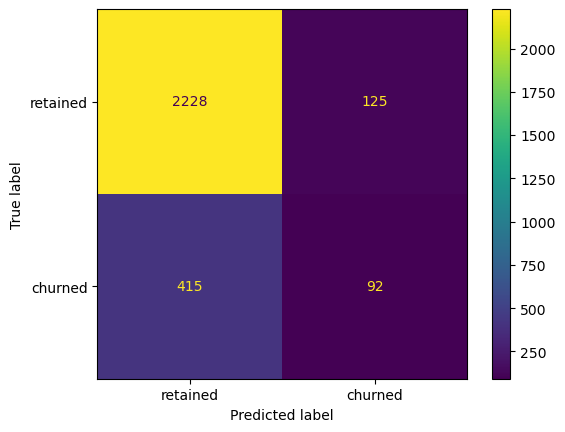

In [136]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['retained', 'churned'])
disp.plot();

- The model predicted three times as many false negatives than it did false positives, and it correctly identified only 16.6% of the users who actually churned.

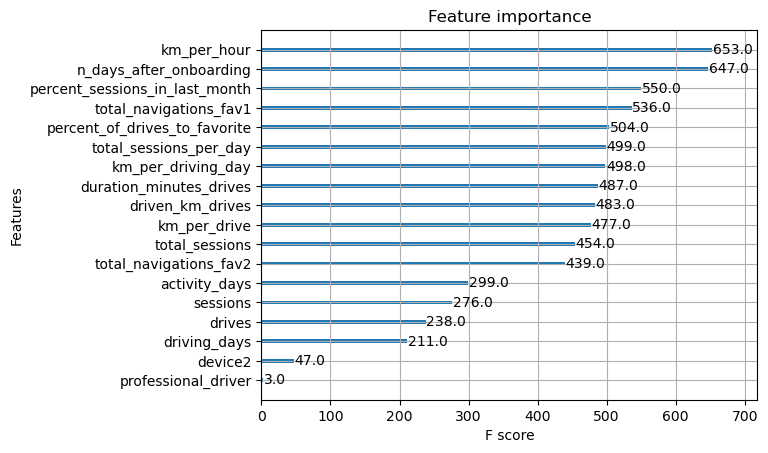

In [137]:
plot_importance(xgb_cv.best_estimator_);

- The XGBoost model made more use of many of the features than did the logistic regression model from the previous course, which weighted a single feature (activity_days) very heavily in its final prediction.

Results:

- If it's used to drive consequential business decisions, the model is not a strong enough predictor, as made clear by its poor recall score. However, if the model is only being used to guide further exploratory efforts, then it can have value.
- New features could be engineered to try to generate better predictive signal, as they often do if we have domain knowledge. In the case of this model, the engineered features made up over half of the top 10 most-predictive features used by the model. It could also be helpful to reconstruct the model with different combinations of predictor variables to reduce noise from unpredictive features.
-  It would be helpful to have drive-level information for each user (such as drive times, geographic locations, etc.). It would probably also be helpful to have more granular data to know how users interact with the app. For example, how often do they report or confirm road hazard alerts? Finally, it could be helpful to know the monthly count of unique starting and ending locations each driver inputs.